# Getting Started Code for [Chunin Exams Food Track- CV'2021](https://www.aicrowd.com/challenges/chunin-exams-food-track-cv-2021) on AIcrowd
#### Author : Pulkit Gera

## Download Necessary Packages 📚

In [ ]:
!pip3 install aicrowd-cli

     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 204kB 12.0MB/s 
     |████████████████████████████████| 163kB 31.2MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [6]:
API_KEY = "fd1aed7204268f0bae2780fb808a4063" #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

/bin/bash: aicrowd: command not found


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# !aicrowd dataset download --challenge chunin-exams-food-track-cv-2021

In [1]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from cv2 import cv2
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from IPython.display import clear_output

### Reading Dataset 

In [1]:

def resize(image,dim=(150,150)):
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

def load_dataset(folder, csv_file  ):
    
    mydic = {}
    with open(csv_file, mode='r') as infile:
        reader = csv.reader(infile)
        mydict = {rows[0]:rows[1] for rows in reader}
    
    y_train = []
    x_train = []
    count = 1500
    for file in os.listdir(folder):
        if True:
          try:
            # print(file)
            y_train.append((mydict[file]))
            x_train.append(resize(cv2.imread(folder+'/'+file)))
            count -= 1
          except KeyError:
            continue
          
    # print("done") 
    y_train = pd.DataFrame(y_train).astype('category')[0]
    y_train = y_train.cat.codes
    return x_train, y_train.to_numpy()

def load_testdata(folder):
  x_test = []
  for file in os.listdir(folder):
    print(file)
    x_test.append(resize(cv2.imread(folder+'/'+file)))
      

def label_encode(y):
  y = pd.DataFrame(y).astype('category')[0]
  y = y.cat.codes
  return y.to_numpy()  

def get_labels(y_train,y_labels)
  for i in range(len(y_train)):
    y_train[i] = (y_labels[y_train[i]])

In [5]:
X,y = load_dataset('/content/drive/MyDrive/Assignment5/train_images','/content/drive/MyDrive/Assignment5/train.csv')
labels = np.unique(y)
y = label_encode(y)

done


In [38]:
# X1,x_val,y1,y_val = train_test_split(X, y, test_size=0.15,random_state=7)
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.15,random_state=7)

In [39]:
def change_color(image):
    image = np.array(image)
    hsv_image = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    return Image.fromarray(hsv_image)

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )

datagen.fit(x_train)



In [40]:
def get_model(opt='adam', dim = 32, batchNormalize = False, weight_initialization='glorot_normal',epochs = 5):
    model = Sequential()
    
    model.add(Conv2D(dim, (3, 3), activation='relu', kernel_initializer=weight_initialization, padding='same', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(2, 2))
    if batchNormalize:
      model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(dim, (3, 3), activation='relu', kernel_initializer=weight_initialization, padding='same'))
    model.add(MaxPooling2D(2, 2))
    if batchNormalize:
      model.add(BatchNormalization())
    model.add(Dropout(0.6))
    
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(61, activation='softmax'))
    keras.optimizers.RMSprop

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(datagen.flow(x_train, y_train1, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data=(x_test[0:100], y_test1[0:100]), epochs = epochs)
    acc = model.history.history['accuracy']
    train_loss = model.history.history['loss']
    test_loss = model.history.history['val_loss']
    
    return model,[acc,train_loss,test_loss]

  

In [41]:
x_train = np.array(x_train)
x_test  = np.array(x_test)

In [42]:
print(x_train.shape)
print(x_test.shape)

(1275, 150, 150, 3)
(225, 150, 150, 3)


In [43]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

### Experimenting with different parameters

#### Experimenting with different Optimizers

##### Adam

In [ ]:
#### weight initialization - xavier
model1,res = get_model('adam',weight_initialization='glorot_normal')


----------- EPOCH 5 -----------
39/39 [==============================] - 6s 159ms/step - loss: 3.7326 - accuracy: 0.1082 - val_loss: 10.6766 - val_accuracy: 0.1000


In [ ]:
#### weight initialization - uniform
model2,res2 = get_model('adam',weight_initialization='uniform')


----------- EPOCH 5 -----------
39/39 [==============================] - 6s 160ms/step - loss: 3.3607 - accuracy: 0.2024 - val_loss: 96.1627 - val_accuracy: 0.1100


In [ ]:
#### weight initialization - normal
model3,res3 = get_model('adam',weight_initialization='normal')


----------- EPOCH 5 -----------
39/39 [==============================] - 6s 160ms/step - loss: 3.3421 - accuracy: 0.2024 - val_loss: 94.3146 - val_accuracy: 0.2100


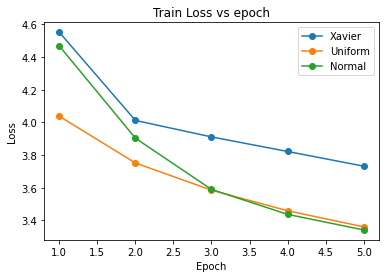

In [ ]:
#### train loss vs epoch
plt.plot( range(1,6),res[1], '-o',label="Xavier") 
plt.plot( range(1,6),res2[1], '-o',label="Uniform") 
plt.plot( range(1,6),res3[1], '-o',label="Normal") 
plt.title( 'Train Loss vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Loss' ) 
plt.legend(loc = 'best')
plt.show() 

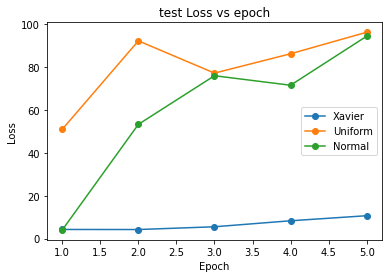

In [ ]:
#### test loss vs epoch
plt.plot( range(1,6),res[2], '-o',label="Xavier") 
plt.plot( range(1,6),res2[2], '-o',label="Uniform") 
plt.plot( range(1,6),res3[2], '-o',label="Normal") 
plt.title( 'test Loss vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Loss' ) 
plt.legend(loc = 'best')
plt.show() 

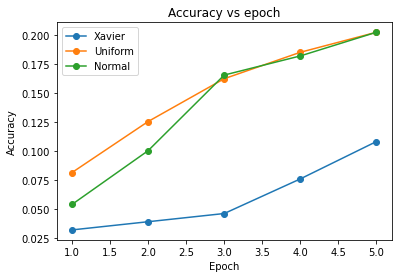

In [ ]:
#### Accuracy vs epoch
plt.plot( range(1,6),res[0], '-o',label="Xavier") 
plt.plot( range(1,6),res2[0], '-o',label="Uniform") 
plt.plot( range(1,6),res3[0], '-o',label="Normal") 
plt.title( 'Accuracy vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Accuracy' ) 
plt.legend(loc = 'best')
plt.show() 

##### RMSprop

In [ ]:
#### weight initialization - xavier
model1,res = get_model(keras.optimizers.RMSprop(),weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 161ms/step - loss: 7.8249 - accuracy: 0.0692 - val_loss: 18.3833 - val_accuracy: 0.0900
Epoch 2/5
39/39 [==============================] - 6s 158ms/step - loss: 3.7966 - accuracy: 0.1367 - val_loss: 33.1073 - val_accuracy: 0.1000
Epoch 3/5
39/39 [==============================] - 6s 158ms/step - loss: 3.6395 - accuracy: 0.1570 - val_loss: 87.6078 - val_accuracy: 0.1000
Epoch 4/5
39/39 [==============================] - 6s 159ms/step - loss: 3.5481 - accuracy: 0.1895 - val_loss: 96.7425 - val_accuracy: 0.1000
Epoch 5/5
39/39 [==============================] - 6s 156ms/step - loss: 3.3986 - accuracy: 0.1963 - val_loss: 102.5398 - val_accuracy: 0.1000


In [ ]:
#### weight initialization - uniform
model2,res2 = get_model(keras.optimizers.RMSprop(),weight_initialization='uniform')


Epoch 1/5
39/39 [==============================] - 7s 161ms/step - loss: 4.4114 - accuracy: 0.0759 - val_loss: 78.0217 - val_accuracy: 0.0900
Epoch 2/5
39/39 [==============================] - 6s 157ms/step - loss: 3.7433 - accuracy: 0.1355 - val_loss: 194.8403 - val_accuracy: 0.0600
Epoch 3/5
39/39 [==============================] - 6s 157ms/step - loss: 3.5365 - accuracy: 0.1617 - val_loss: 122.4563 - val_accuracy: 0.1200
Epoch 4/5
39/39 [==============================] - 6s 156ms/step - loss: 3.4597 - accuracy: 0.1721 - val_loss: 147.1982 - val_accuracy: 0.1500
Epoch 5/5
39/39 [==============================] - 6s 157ms/step - loss: 3.2968 - accuracy: 0.1839 - val_loss: 155.4440 - val_accuracy: 0.1300


In [ ]:
#### weight initialization - normal
model3,res3 = get_model(keras.optimizers.RMSprop(),weight_initialization='normal')


Epoch 1/5
39/39 [==============================] - 7s 162ms/step - loss: 4.9686 - accuracy: 0.0901 - val_loss: 6.3344 - val_accuracy: 0.1700
Epoch 2/5
39/39 [==============================] - 6s 158ms/step - loss: 3.6740 - accuracy: 0.1458 - val_loss: 24.3767 - val_accuracy: 0.1000
Epoch 3/5
39/39 [==============================] - 6s 159ms/step - loss: 3.5466 - accuracy: 0.1651 - val_loss: 21.5988 - val_accuracy: 0.1200
Epoch 4/5
39/39 [==============================] - 6s 158ms/step - loss: 3.4449 - accuracy: 0.1747 - val_loss: 33.1219 - val_accuracy: 0.2000
Epoch 5/5
39/39 [==============================] - 6s 158ms/step - loss: 3.2808 - accuracy: 0.1986 - val_loss: 26.2739 - val_accuracy: 0.1500


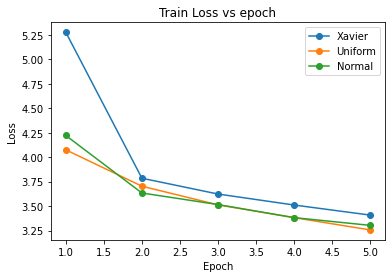

In [ ]:
#### train loss vs epoch
plt.plot( range(1,6),res[1], '-o',label="Xavier") 
plt.plot( range(1,6),res2[1], '-o',label="Uniform") 
plt.plot( range(1,6),res3[1], '-o',label="Normal") 
plt.title( 'Train Loss vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Loss' ) 
plt.legend(loc = 'best')
plt.show() 

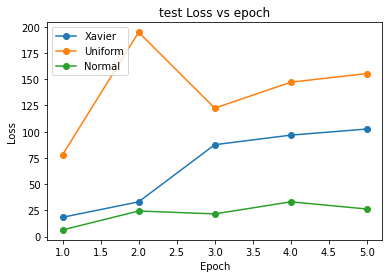

In [ ]:
#### test loss vs epoch
plt.plot( range(1,6),res[2], '-o',label="Xavier") 
plt.plot( range(1,6),res2[2], '-o',label="Uniform") 
plt.plot( range(1,6),res3[2], '-o',label="Normal") 
plt.title( 'test Loss vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Loss' ) 
plt.legend(loc = 'best')
plt.show() 

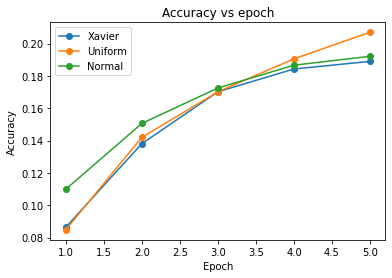

In [ ]:
#### Accuracy vs epoch
plt.plot( range(1,6),res[0], '-o',label="Xavier") 
plt.plot( range(1,6),res2[0], '-o',label="Uniform") 
plt.plot( range(1,6),res3[0], '-o',label="Normal") 
plt.title( 'Accuracy vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Accuracy' ) 
plt.legend(loc = 'best')
plt.show()

##### SGD

In [ ]:
#### weight initialization - xavier
model1,res = get_model(keras.optimizers.SGD(lr=0.01, momentum=0.9),weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 163ms/step - loss: 4.0820 - accuracy: 0.0716 - val_loss: 5.6747 - val_accuracy: 0.1100
Epoch 2/5
39/39 [==============================] - 6s 161ms/step - loss: 3.6521 - accuracy: 0.1546 - val_loss: 17.4671 - val_accuracy: 0.1100
Epoch 3/5
39/39 [==============================] - 6s 158ms/step - loss: 3.5706 - accuracy: 0.1708 - val_loss: 17.2420 - val_accuracy: 0.1600
Epoch 4/5
39/39 [==============================] - 6s 158ms/step - loss: 3.4469 - accuracy: 0.1622 - val_loss: 56.7146 - val_accuracy: 0.0800
Epoch 5/5
39/39 [==============================] - 6s 156ms/step - loss: 3.3251 - accuracy: 0.1814 - val_loss: 20.4161 - val_accuracy: 0.0900


In [ ]:
#### weight initialization - uniform
model2,res2 = get_model(keras.optimizers.SGD(lr=0.01, momentum=0.9),weight_initialization='uniform')


Epoch 1/5
39/39 [==============================] - 7s 163ms/step - loss: 3.9767 - accuracy: 0.0545 - val_loss: 44.1590 - val_accuracy: 0.0900
Epoch 2/5
39/39 [==============================] - 6s 159ms/step - loss: 3.7421 - accuracy: 0.1196 - val_loss: 32.3305 - val_accuracy: 0.1200
Epoch 3/5
39/39 [==============================] - 6s 157ms/step - loss: 3.5891 - accuracy: 0.1573 - val_loss: 32.2443 - val_accuracy: 0.1600
Epoch 4/5
39/39 [==============================] - 6s 159ms/step - loss: 3.4401 - accuracy: 0.1769 - val_loss: 48.7202 - val_accuracy: 0.0900
Epoch 5/5
39/39 [==============================] - 6s 158ms/step - loss: 3.4096 - accuracy: 0.1775 - val_loss: 22.9000 - val_accuracy: 0.1000


In [ ]:
#### weight initialization - normal
model3,res3 = get_model(keras.optimizers.SGD(lr=0.01, momentum=0.9),weight_initialization='normal')


Epoch 1/5
39/39 [==============================] - 7s 162ms/step - loss: 4.0091 - accuracy: 0.0677 - val_loss: 13.0857 - val_accuracy: 0.1100
Epoch 2/5
39/39 [==============================] - 6s 157ms/step - loss: 3.7484 - accuracy: 0.1137 - val_loss: 30.3174 - val_accuracy: 0.1600
Epoch 3/5
39/39 [==============================] - 6s 158ms/step - loss: 3.5558 - accuracy: 0.1648 - val_loss: 33.7965 - val_accuracy: 0.1200
Epoch 4/5
39/39 [==============================] - 6s 157ms/step - loss: 3.4632 - accuracy: 0.1630 - val_loss: 89.4259 - val_accuracy: 0.1300
Epoch 5/5
39/39 [==============================] - 6s 156ms/step - loss: 3.3789 - accuracy: 0.1754 - val_loss: 93.5010 - val_accuracy: 0.1100


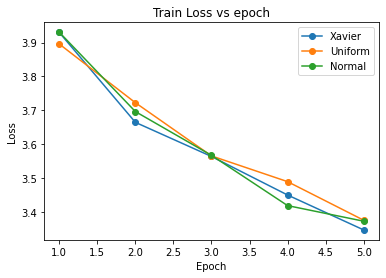

In [ ]:
#### train loss vs epoch
plt.plot( range(1,6),res[1], '-o',label="Xavier") 
plt.plot( range(1,6),res2[1], '-o',label="Uniform") 
plt.plot( range(1,6),res3[1], '-o',label="Normal") 
plt.title( 'Train Loss vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Loss' ) 
plt.legend(loc = 'best')
plt.show() 

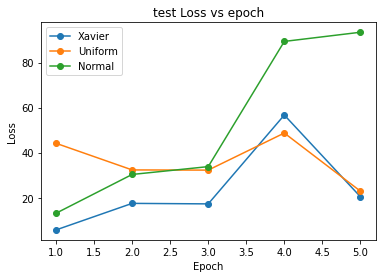

In [ ]:
#### test loss vs epoch
plt.plot( range(1,6),res[2], '-o',label="Xavier") 
plt.plot( range(1,6),res2[2], '-o',label="Uniform") 
plt.plot( range(1,6),res3[2], '-o',label="Normal") 
plt.title( 'test Loss vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Loss' ) 
plt.legend(loc = 'best')
plt.show() 

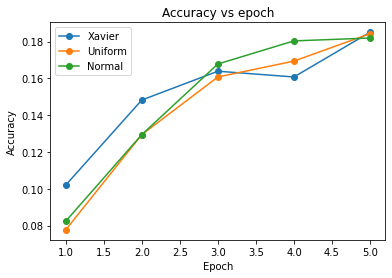

In [ ]:
#### Accuracy vs epoch
plt.plot( range(1,6),res[0], '-o',label="Xavier") 
plt.plot( range(1,6),res2[0], '-o',label="Uniform") 
plt.plot( range(1,6),res3[0], '-o',label="Normal") 
plt.title( 'Accuracy vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Accuracy' ) 
plt.legend(loc = 'best')
plt.show()

#### Batch Normalization

It is used to bring the numerical data to a common scale without distorting its shape. A typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes place in batches, not as a single input.

Advantages of Batch Normalization:

- Speed Up the Training
- Handles internal covariate shift
- Smoothens the Loss Function

In [ ]:
#### Adam
model1,res = get_model('adam', batchNormalize = True, weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 164ms/step - loss: 6.4707 - accuracy: 0.0630 - val_loss: 114.9321 - val_accuracy: 0.0300
Epoch 2/5
39/39 [==============================] - 6s 159ms/step - loss: 4.6508 - accuracy: 0.0996 - val_loss: 99.0399 - val_accuracy: 0.0000e+00
Epoch 3/5
39/39 [==============================] - 6s 160ms/step - loss: 3.9942 - accuracy: 0.1115 - val_loss: 118.8631 - val_accuracy: 0.1000
Epoch 4/5
39/39 [==============================] - 6s 160ms/step - loss: 3.6724 - accuracy: 0.1323 - val_loss: 244.3827 - val_accuracy: 0.0600
Epoch 5/5
39/39 [==============================] - 6s 160ms/step - loss: 3.5603 - accuracy: 0.1729 - val_loss: 162.5850 - val_accuracy: 0.0700


In [ ]:
#### RMSprop
model2,res2 = get_model(keras.optimizers.RMSprop(), batchNormalize = True, weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 168ms/step - loss: 7.6200 - accuracy: 0.0570 - val_loss: 172.9933 - val_accuracy: 0.0100
Epoch 2/5
39/39 [==============================] - 6s 158ms/step - loss: 4.2536 - accuracy: 0.1085 - val_loss: 494.4758 - val_accuracy: 0.0400
Epoch 3/5
39/39 [==============================] - 6s 159ms/step - loss: 4.0144 - accuracy: 0.1286 - val_loss: 221.8357 - val_accuracy: 0.0700
Epoch 4/5
39/39 [==============================] - 6s 163ms/step - loss: 3.8547 - accuracy: 0.1573 - val_loss: 638.1219 - val_accuracy: 0.0000e+00
Epoch 5/5
39/39 [==============================] - 6s 159ms/step - loss: 3.7169 - accuracy: 0.1490 - val_loss: 856.5594 - val_accuracy: 0.0500


In [ ]:
#### SGD
model3,res3 = get_model(keras.optimizers.SGD(lr=0.01, momentum=0.9), batchNormalize = True, weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 163ms/step - loss: 6.2118 - accuracy: 0.0326 - val_loss: 5748.3726 - val_accuracy: 0.0900
Epoch 2/5
39/39 [==============================] - 6s 160ms/step - loss: 3.9953 - accuracy: 0.1383 - val_loss: 1578.5542 - val_accuracy: 0.0900
Epoch 3/5
39/39 [==============================] - 6s 158ms/step - loss: 3.8593 - accuracy: 0.1201 - val_loss: 1169.1581 - val_accuracy: 0.0900
Epoch 4/5
39/39 [==============================] - 6s 158ms/step - loss: 3.8331 - accuracy: 0.1190 - val_loss: 876.7316 - val_accuracy: 0.0900
Epoch 5/5
39/39 [==============================] - 6s 158ms/step - loss: 3.7746 - accuracy: 0.1148 - val_loss: 653.5858 - val_accuracy: 0.0900


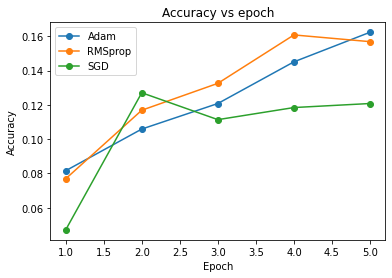

In [ ]:
#### Accuracy vs epoch
plt.plot( range(1,6),res[0], '-o',label="Adam") 
plt.plot( range(1,6),res2[0], '-o',label="RMSprop") 
plt.plot( range(1,6),res3[0], '-o',label="SGD") 
plt.title( 'Accuracy vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Accuracy' ) 
plt.legend(loc = 'best')
plt.show()

#### Experimenting with number of hidden neurons

- Increasing the number of neurons in the hidden layers might improve the accuracy or might not, it really depends on the complexity of the problem that we are trying to solve
- This would increases the number of weights in the network, ergo the model complexity. Without a large training set, an increasingly large network is likely to overfit and in turn reduce accuracy on the test data

In [44]:
model1,res = get_model(keras.optimizers.RMSprop(), dim = 8, batchNormalize = True, weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 155ms/step - loss: 5.6530 - accuracy: 0.0576 - val_loss: 92.4124 - val_accuracy: 0.0100
Epoch 2/5
39/39 [==============================] - 6s 148ms/step - loss: 4.1146 - accuracy: 0.1147 - val_loss: 73.6488 - val_accuracy: 0.0500
Epoch 3/5
39/39 [==============================] - 6s 149ms/step - loss: 3.7162 - accuracy: 0.1421 - val_loss: 66.2237 - val_accuracy: 0.0500
Epoch 4/5
39/39 [==============================] - 6s 151ms/step - loss: 3.6822 - accuracy: 0.1286 - val_loss: 215.2775 - val_accuracy: 0.0600
Epoch 5/5
39/39 [==============================] - 6s 148ms/step - loss: 3.5052 - accuracy: 0.1717 - val_loss: 139.3819 - val_accuracy: 0.0800


In [45]:
model2,res2 = get_model(keras.optimizers.RMSprop(), dim = 16, batchNormalize = True, weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 7s 156ms/step - loss: 6.2506 - accuracy: 0.0648 - val_loss: 87.2090 - val_accuracy: 0.0400
Epoch 2/5
39/39 [==============================] - 6s 151ms/step - loss: 4.1917 - accuracy: 0.1205 - val_loss: 179.0945 - val_accuracy: 0.0400
Epoch 3/5
39/39 [==============================] - 6s 153ms/step - loss: 3.9708 - accuracy: 0.1406 - val_loss: 284.2243 - val_accuracy: 0.0400
Epoch 4/5
39/39 [==============================] - 6s 154ms/step - loss: 3.8135 - accuracy: 0.1419 - val_loss: 152.8543 - val_accuracy: 0.0200
Epoch 5/5
39/39 [==============================] - 6s 153ms/step - loss: 3.5106 - accuracy: 0.1631 - val_loss: 355.2156 - val_accuracy: 0.0200


In [46]:
model3,res3 = get_model(keras.optimizers.RMSprop(), dim = 64, batchNormalize = True, weight_initialization='glorot_normal')


Epoch 1/5
39/39 [==============================] - 8s 170ms/step - loss: 13.5032 - accuracy: 0.0622 - val_loss: 554.4725 - val_accuracy: 0.0300
Epoch 2/5
39/39 [==============================] - 6s 157ms/step - loss: 4.6422 - accuracy: 0.0873 - val_loss: 575.6631 - val_accuracy: 0.0700
Epoch 3/5
39/39 [==============================] - 6s 159ms/step - loss: 4.1281 - accuracy: 0.1302 - val_loss: 921.8217 - val_accuracy: 0.0500
Epoch 4/5
39/39 [==============================] - 6s 160ms/step - loss: 4.0997 - accuracy: 0.1254 - val_loss: 1022.0901 - val_accuracy: 0.0400
Epoch 5/5
39/39 [==============================] - 6s 160ms/step - loss: 3.9829 - accuracy: 0.1261 - val_loss: 1693.1561 - val_accuracy: 0.0800


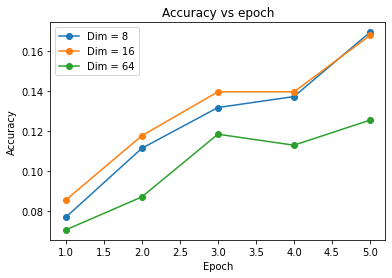

In [48]:
#### Accuracy vs epoch
plt.plot( range(1,6),res[0], '-o',label="Dim = 8") 
plt.plot( range(1,6),res2[0], '-o',label="Dim = 16") 
plt.plot( range(1,6),res3[0], '-o',label="Dim = 64") 
plt.title( 'Accuracy vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Accuracy' ) 
plt.legend(loc = 'best')
plt.show()

#### Leaky relu activation

In [51]:
def get_model_lr(opt='adam', dim = 32, batchNormalize = False, weight_initialization='glorot_normal',epochs = 10):
    model = Sequential()
    
    model.add(Conv2D(dim, (3, 3), kernel_initializer=weight_initialization, padding='same', input_shape=(150, 150, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(2, 2))
    if batchNormalize:
      model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Conv2D(dim*2, (3, 3), kernel_initializer=weight_initialization, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(2, 2))
    if batchNormalize:
      model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(61, activation='softmax'))
    keras.optimizers.RMSprop

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(datagen.flow(x_train, y_train1, batch_size=32),steps_per_epoch=len(x_train) / 32, validation_data=(x_test[0:100], y_test1[0:100]), epochs = epochs)
    acc = model.history.history['accuracy']
    train_loss = model.history.history['loss']
    test_loss = model.history.history['val_loss']
    
    return model,[acc,train_loss,test_loss]


In [52]:
#### Adam
model1,res = get_model_lr('adam', batchNormalize = True, weight_initialization='glorot_normal')

Epoch 1/10
39/39 [==============================] - 7s 173ms/step - loss: 25.2873 - accuracy: 0.0572 - val_loss: 275.1227 - val_accuracy: 0.0000e+00
Epoch 2/10
39/39 [==============================] - 7s 163ms/step - loss: 15.1296 - accuracy: 0.1434 - val_loss: 484.1981 - val_accuracy: 0.0100
Epoch 3/10
39/39 [==============================] - 7s 165ms/step - loss: 6.3087 - accuracy: 0.1365 - val_loss: 321.2641 - val_accuracy: 0.0900
Epoch 4/10
39/39 [==============================] - 7s 166ms/step - loss: 3.5479 - accuracy: 0.2083 - val_loss: 429.5385 - val_accuracy: 0.1200
Epoch 5/10
39/39 [==============================] - 7s 165ms/step - loss: 3.4444 - accuracy: 0.1941 - val_loss: 370.3118 - val_accuracy: 0.0300
Epoch 6/10
39/39 [==============================] - 7s 165ms/step - loss: 3.1556 - accuracy: 0.2372 - val_loss: 231.1751 - val_accuracy: 0.0800
Epoch 7/10
39/39 [==============================] - 7s 164ms/step - loss: 3.0276 - accuracy: 0.2298 - val_loss: 271.3373 - val_acc

In [53]:
#### RMSprop
model2,res2 = get_model_lr(keras.optimizers.RMSprop(), batchNormalize = True, weight_initialization='glorot_normal')

Epoch 1/10
39/39 [==============================] - 8s 174ms/step - loss: 36.4704 - accuracy: 0.0768 - val_loss: 331.0943 - val_accuracy: 0.0300
Epoch 2/10
39/39 [==============================] - 7s 172ms/step - loss: 6.5446 - accuracy: 0.1124 - val_loss: 229.6067 - val_accuracy: 0.0900
Epoch 3/10
39/39 [==============================] - 7s 173ms/step - loss: 4.3960 - accuracy: 0.1389 - val_loss: 117.8146 - val_accuracy: 0.1000
Epoch 4/10
39/39 [==============================] - 7s 176ms/step - loss: 3.8841 - accuracy: 0.1510 - val_loss: 104.0629 - val_accuracy: 0.1500
Epoch 5/10
39/39 [==============================] - 7s 170ms/step - loss: 3.6841 - accuracy: 0.1803 - val_loss: 365.3860 - val_accuracy: 0.0700
Epoch 6/10
39/39 [==============================] - 7s 172ms/step - loss: 3.6127 - accuracy: 0.1623 - val_loss: 417.8860 - val_accuracy: 0.1200
Epoch 7/10
39/39 [==============================] - 7s 171ms/step - loss: 3.5656 - accuracy: 0.1540 - val_loss: 660.9135 - val_accuracy

In [54]:
#### SGD
model3,res3 = get_model_lr(keras.optimizers.SGD(lr=0.01, momentum=0.9), batchNormalize = True, weight_initialization='glorot_normal')

Epoch 1/10
39/39 [==============================] - 7s 169ms/step - loss: 11.3519 - accuracy: 0.0510 - val_loss: 14724.6611 - val_accuracy: 0.0400
Epoch 2/10
39/39 [==============================] - 7s 166ms/step - loss: 3.9941 - accuracy: 0.0606 - val_loss: 8362.4766 - val_accuracy: 0.0900
Epoch 3/10
39/39 [==============================] - 7s 164ms/step - loss: 4.0644 - accuracy: 0.0942 - val_loss: 5757.8994 - val_accuracy: 0.0900
Epoch 4/10
39/39 [==============================] - 7s 166ms/step - loss: 4.0100 - accuracy: 0.0801 - val_loss: 4783.1128 - val_accuracy: 0.0900
Epoch 5/10
39/39 [==============================] - 7s 167ms/step - loss: 3.9579 - accuracy: 0.0790 - val_loss: 4310.5278 - val_accuracy: 0.0900
Epoch 6/10
39/39 [==============================] - 7s 163ms/step - loss: 3.9290 - accuracy: 0.0843 - val_loss: 4049.7688 - val_accuracy: 0.0900
Epoch 7/10
39/39 [==============================] - 7s 164ms/step - loss: 3.8751 - accuracy: 0.0893 - val_loss: 3875.4851 - val_

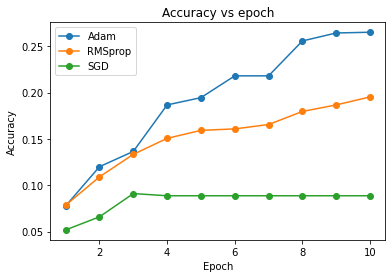

In [56]:
#### Accuracy vs epoch
plt.plot( range(1,11),res[0], '-o',label="Adam") 
plt.plot( range(1,11),res2[0], '-o',label="RMSprop") 
plt.plot( range(1,11),res3[0], '-o',label="SGD") 
plt.title( 'Accuracy vs epoch' ) 
plt.xlabel( 'Epoch' ) 
plt.ylabel( 'Accuracy' ) 
plt.legend(loc = 'best')
plt.show()

### Final Model

From the all the above observation it is clear that the model with following parameters is giving better performance.
- 2 hidden that has 32 neurons in each layer 
- 'Normal' kernel initialization 
- Adam Optimizer
- Batch Normalization

In [ ]:
model,res = get_model('adam',dim=32,batchNormalize = True, weight_initialization='normal',epochs = 20)

## Part 2

In [ ]:
X_train,y_train = load_dataset('/content/drive/MyDrive/Assignment5/train_images','/content/drive/MyDrive/Assignment5/train.csv')
X_test = load_testdata('/content/drive/MyDrive/Assignment5/test_images')

In [23]:
labels = (np.unique(y_train))
y_train = label_encode(y_train)
y_train = to_categorical(y_train)


#### ResNet50

In [ ]:
img = Input(shape = (150, 150)+(3,))
model = ResNet50(
    weights = 'imagenet',include_top = False,
    input_tensor = img, pooling = 'max',classes=61)
output_layer = Dense(61, activation = 'softmax')(model.layers[-1].output)
model = Model(inputs=img, outputs=output_layer)

model.compile(optimizer = 'adam',metrics = ['accuracy'], loss = "sparse_categorical_crossentropy")
model.fit(X_train, y_train, epochs=20, validation_split=0.3) 


Epoch 1/20
204/204 [==============================] - 71s 347ms/step - loss: 2.7403 - accuracy: 0.2884 - val_loss: 3.0704 - val_accuracy: 0.2646
Epoch 2/20
204/204 [==============================] - 71s 349ms/step - loss: 2.6237 - accuracy: 0.3062 - val_loss: 3.7055 - val_accuracy: 0.1194
Epoch 3/20
204/204 [==============================] - 72s 351ms/step - loss: 2.5312 - accuracy: 0.3235 - val_loss: 4.2843 - val_accuracy: 0.0883
Epoch 4/20
204/204 [==============================] - 72s 352ms/step - loss: 2.6729 - accuracy: 0.2979 - val_loss: 3.7927 - val_accuracy: 0.1198
Epoch 5/20
204/204 [==============================] - 72s 352ms/step - loss: 2.4197 - accuracy: 0.3500 - val_loss: 2.8806 - val_accuracy: 0.2703
Epoch 6/20
204/204 [==============================] - 72s 352ms/step - loss: 2.2483 - accuracy: 0.3817 - val_loss: 2.6362 - val_accuracy: 0.3085
Epoch 7/20
204/204 [==============================] - 72s 352ms/step - loss: 2.2358 - accuracy: 0.3950 - val_loss: 3.8049 - val_ac

In [30]:
model.save("/content/drive/MyDrive/Assignment5/model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Assignment5/model/assets


In [28]:
y_pred = model.predict(np.array(X_test))
y_pred = (np.argmax(y_pred, axis = 1))

y_pred = get_labels(y_pred,labels)


In [29]:
df_regressor = pd.DataFrame(y_pred, columns=['ClassName'])
df_regressor.to_csv("/content/drive/MyDrive/Assignment5/submission.csv")

## Making Direct Submission thought Aicrowd CLI

In [ ]:
!aicrowd submission create -c chunin-exams-food-track-cv-2021 -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 13.1/11.5 KB • 1.4 MB/s • 0:00:00
                                                 ╭─────────────────────────╮                                                  
                                                 │ Successfully submitted! │                                                  
                                                 ╰─────────────────────────╯                                                  
                                                       Important links                                                        
┌──────────────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-7/problems/stage-prediction/submissions/125933              │
│                  │                                                                                                         │
│  All submissions │ https://w